# import libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"
import warnings
warnings.filterwarnings("ignore")

# 2.Import Dataset

In [4]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')
raw_df.head()

Zomato URL     Name of Restaurant  \
0  https://www.zomato.com/chennai/yaa-mohaideen-b...  Yaa Mohaideen Briyani   
1  https://www.zomato.com/chennai/sukkubhai-biriy...     Sukkubhai Biriyani   
2  https://www.zomato.com/chennai/ss-hyderabad-bi...   SS Hyderabad Biryani   
3        https://www.zomato.com/chennai/kfc-perambur                    KFC   
4  https://www.zomato.com/chennai/tasty-kitchen-p...          Tasty Kitchen   

                                             Address     Location  \
0          336 & 338, Main Road, Pallavaram, Chennai   Pallavaram   
1   New 14, Old 11/3Q, Railway Station Road, MKN ...      Alandur   
2   98/339, Arcot Road, Opposite Gokulam Chit Fun...  Kodambakkam   
3   10, Periyar Nagar, 70 Feet Road, Near Sheeba ...     Perambur   
4   135B, SRP Colony, Peravallur, Near Perambur, ...     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

   Dining Rating Dining Rating Count  Delivery Rating Delivery Rating Count  \
0            4.3                1500              4.3                  9306   
1            4.4                3059              4.1                 39200   
2            4.3                1361              4.4                 10500   
3            4.0                1101              4.0                 11200   
4            4.2                 617              4.1                 22400   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [6]:
raw_df.shape

(12032, 12)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [8]:
raw_df.describe()

Price for 2  Dining Rating  Delivery Rating
count  12032.000000    6681.000000      6181.000000
mean     397.611370       3.387756         3.805290
std      332.045938       0.558181         0.374213
min       40.000000       0.300000         0.300000
25%      200.000000       3.100000         3.600000
50%      300.000000       3.500000         3.900000
75%      450.000000       3.800000         4.000000
max     5000.000000       4.900000         4.700000

In [12]:
wrong_data = raw_df['Top Dishes'] == 'Top Dishes'
raw_df[wrong_data]

Empty DataFrame
Columns: [Zomato URL, Name of Restaurant, Address, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [13]:
raw_df.drop(['Zomato URL', 'Address'], axis = 1, inplace=True)

In [15]:
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                        ['Biryani']   
1  ['Biryani', ' North Indian', ' Mughlai', ' Des...   
2  ['Biryani', ' North Indian', ' Chinese', ' Ara...   
3  ['Burger', ' Fast Food', ' Finger Food', ' Bev...   
4  ['Chinese', ' Biryani', ' North Indian', ' Che...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

   Dining Rating Dining Rating Count  Delivery Rating Delivery Rating Count  \
0            4.3                1500              4.3                  9306   
1            4.4                3059              4.1                 39200   
2            4.3                1361              4.4                 10500   
3            4.0                1101              4.0                 11200   
4            4.2                 617              4.1                 22400   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [16]:
raw_df.isnull() 

Name of Restaurant  Location  Cuisine  Top Dishes  Price for 2  \
0                   False     False    False       False        False   
1                   False     False    False       False        False   
2                   False     False    False       False        False   
3                   False     False    False       False        False   
4                   False     False    False       False        False   
...                   ...       ...      ...         ...          ...   
12027               False     False    False       False        False   
12028               False     False    False       False        False   
12029               False     False    False       False        False   
12030               False     False    False       False        False   
12031               False     False    False       False        False   

       Dining Rating  Dining Rating Count  Delivery Rating  \
0              False                False            False   
1              False                False            False   
2              False                False            False   
3              False                False            False   
4              False                False            False   
...              ...                  ...              ...   
12027           True                 True             True   
12028           True                 True             True   
12029           True                 True             True   
12030           True                 True             True   
12031           True                 True             True   

       Delivery Rating Count  Features  
0                      False     False  
1                      False     False  
2                      False     False  
3                      False     False  
4                      False     False  
...                      ...       ...  
12027                   True     False  
12028                   True     False  
12029                   True     False  
12030                   True     False  
12031                   True     False  

[12032 rows x 10 columns]

In [17]:
raw_df.isnull().sum()

Name of Restaurant          0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [18]:
raw_df[raw_df['Dining Rating'].isnull()]

Name of Restaurant         Location  \
6             Bai Veetu Kalyanam         Navallur   
77      Al Dhareeq Beef Biriyani      Kodambakkam   
106            Twilight Take Out     Nungambakkam   
107                  The Red Box  Anna Nagar West   
114    Charminar Biriyani Centre       Royapettah   
...                          ...              ...   
12027            CK's Sandwiches            Porur   
12028            CK's Sandwiches         Kolathur   
12029            CK's Sandwiches  Anna Nagar East   
12030            CK's Sandwiches        Ramapuram   
12031            CK's Sandwiches   Sholinganallur   

                                                 Cuisine  \
6                                            ['Biryani']   
77                                           ['Biryani']   
106    ['North Indian', ' Chinese', ' Rolls', ' Conti...   
107                                          ['Chinese']   
114                         ['Biryani', ' North Indian']   
...                                                  ...   
12027                                       ['Sandwich']   
12028                                       ['Sandwich']   
12029                                       ['Sandwich']   
12030                                       ['Sandwich']   
12031                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
6      ['Bread Halwa', ' Mutton Biryani', ' Brinjal G...        350.0   
77                                      ['Beef Biryani']        300.0   
106    ['Club Sandwich', ' Chicken Tikka Roll', ' Chi...        350.0   
107    ['Noodle', ' Chilli Chicken Gravy', ' Dragon C...        200.0   
114    ['Chicken Biryani', ' Bread Halwa', ' Brinjal ...        300.0   
...                                                  ...          ...   
12027                                            Invalid        350.0   
12028                                            Invalid        350.0   
12029                                            Invalid        350.0   
12030                                            Invalid        350.0   
12031                                            Invalid        350.0   

       Dining Rating    Dining Rating Count  Delivery Rating  \
6                NaN  Does not offer Dining              4.3   
77               NaN  Does not offer Dining              3.9   
106              NaN  Does not offer Dining              4.0   
107              NaN  Does not offer Dining              4.2   
114              NaN  Does not offer Dining              3.9   
...              ...                    ...              ...   
12027            NaN                    NaN              NaN   
12028            NaN                    NaN              NaN   
12029            NaN                    NaN              NaN   
12030            NaN                    NaN              NaN   
12031            NaN                    NaN              NaN   

      Delivery Rating Count                              Features  
6                      1061                     ['Home Delivery']  
77                    19600                     ['Home Delivery']  
106                   11200     ['Home Delivery', 'Free Parking']  
107                   11500                     ['Home Delivery']  
114                     652  ['Home Delivery', 'Standing Tables']  
...                     ...                                   ...  
12027                   NaN        ['Breakfast', 'Delivery Only']  
12028                   NaN        ['Breakfast', 'Delivery Only']  
12029                   NaN        ['Breakfast', 'Delivery Only']  
12030                   NaN        ['Breakfast', 'Delivery Only']  
12031                   NaN        ['Breakfast', 'Delivery Only']  

[5351 rows x 10 columns]

In [19]:
raw_df[raw_df['Dining Rating Count'].isnull()]

Name of Restaurant         Location  \
1603                           Erode Amman Mess    Thiruvanmiyur   
2159   The Ultimate Brownie And Chocolate Place   Sholinganallur   
2419                     Amudha Aunty's kitchen   Sholinganallur   
2537                                 TN 03 CAFE     Tiruvottiyur   
2542                                Maggi Point         Tambaram   
...                                         ...              ...   
12027                           CK's Sandwiches            Porur   
12028                           CK's Sandwiches         Kolathur   
12029                           CK's Sandwiches  Anna Nagar East   
12030                           CK's Sandwiches        Ramapuram   
12031                           CK's Sandwiches   Sholinganallur   

                                                 Cuisine        Top Dishes  \
1603   ['Chettinad', ' South Indian', ' Kerala', ' Ch...           Invalid   
2159                             ['Bakery', ' Desserts']           Invalid   
2419                          ['Tamil', ' South Indian']           Invalid   
2537   ['Sandwich', ' Fast Food', ' Ice Cream', ' Bev...           Invalid   
2542         ['Fast Food', ' Street Food', ' Beverages']  ['Masala Maggi']   
...                                                  ...               ...   
12027                                       ['Sandwich']           Invalid   
12028                                       ['Sandwich']           Invalid   
12029                                       ['Sandwich']           Invalid   
12030                                       ['Sandwich']           Invalid   
12031                                       ['Sandwich']           Invalid   

       Price for 2  Dining Rating Dining Rating Count  Delivery Rating  \
1603         600.0            NaN                 NaN              NaN   
2159         350.0            NaN                 NaN              NaN   
2419         250.0            NaN                 NaN              NaN   
2537         200.0            NaN                 NaN              NaN   
2542         500.0            NaN                 NaN              NaN   
...            ...            ...                 ...              ...   
12027        350.0            NaN                 NaN              NaN   
12028        350.0            NaN                 NaN              NaN   
12029        350.0            NaN                 NaN              NaN   
12030        350.0            NaN                 NaN              NaN   
12031        350.0            NaN                 NaN              NaN   

      Delivery Rating Count                                           Features  
1603                    NaN  ['Home Delivery', 'Indoor Seating', 'Table boo...  
2159                    NaN            ['Delivery Only', 'Desserts and Bakes']  
2419                    NaN                     ['Breakfast', 'Delivery Only']  
2537                    NaN                                  ['Delivery Only']  
2542                    NaN                ['Home Delivery', 'Indoor Seating']  
...                     ...                                                ...  
12027                   NaN                     ['Breakfast', 'Delivery Only']  
12028                   NaN                     ['Breakfast', 'Delivery Only']  
12029                   NaN                     ['Breakfast', 'Delivery Only']  
12030                   NaN                     ['Breakfast', 'Delivery Only']  
12031                   NaN                     ['Breakfast', 'Delivery Only']  

[220 rows x 10 columns]

In [20]:
raw_df[raw_df['Delivery Rating Count'].isnull()]

Name of Restaurant         Location  \
1603                           Erode Amman Mess    Thiruvanmiyur   
2159   The Ultimate Brownie And Chocolate Place   Sholinganallur   
2419                     Amudha Aunty's kitchen   Sholinganallur   
2537                                 TN 03 CAFE     Tiruvottiyur   
2542                                Maggi Point         Tambaram   
...                                         ...              ...   
12027                           CK's Sandwiches            Porur   
12028                           CK's Sandwiches         Kolathur   
12029                           CK's Sandwiches  Anna Nagar East   
12030                           CK's Sandwiches        Ramapuram   
12031                           CK's Sandwiches   Sholinganallur   

                                                 Cuisine        Top Dishes  \
1603   ['Chettinad', ' South Indian', ' Kerala', ' Ch...           Invalid   
2159                             ['Bakery', ' Desserts']           Invalid   
2419                          ['Tamil', ' South Indian']           Invalid   
2537   ['Sandwich', ' Fast Food', ' Ice Cream', ' Bev...           Invalid   
2542         ['Fast Food', ' Street Food', ' Beverages']  ['Masala Maggi']   
...                                                  ...               ...   
12027                                       ['Sandwich']           Invalid   
12028                                       ['Sandwich']           Invalid   
12029                                       ['Sandwich']           Invalid   
12030                                       ['Sandwich']           Invalid   
12031                                       ['Sandwich']           Invalid   

       Price for 2  Dining Rating Dining Rating Count  Delivery Rating  \
1603         600.0            NaN                 NaN              NaN   
2159         350.0            NaN                 NaN              NaN   
2419         250.0            NaN                 NaN              NaN   
2537         200.0            NaN                 NaN              NaN   
2542         500.0            NaN                 NaN              NaN   
...            ...            ...                 ...              ...   
12027        350.0            NaN                 NaN              NaN   
12028        350.0            NaN                 NaN              NaN   
12029        350.0            NaN                 NaN              NaN   
12030        350.0            NaN                 NaN              NaN   
12031        350.0            NaN                 NaN              NaN   

      Delivery Rating Count                                           Features  
1603                    NaN  ['Home Delivery', 'Indoor Seating', 'Table boo...  
2159                    NaN            ['Delivery Only', 'Desserts and Bakes']  
2419                    NaN                     ['Breakfast', 'Delivery Only']  
2537                    NaN                                  ['Delivery Only']  
2542                    NaN                ['Home Delivery', 'Indoor Seating']  
...                     ...                                                ...  
12027                   NaN                     ['Breakfast', 'Delivery Only']  
12028                   NaN                     ['Breakfast', 'Delivery Only']  
12029                   NaN                     ['Breakfast', 'Delivery Only']  
12030                   NaN                     ['Breakfast', 'Delivery Only']  
12031                   NaN                     ['Breakfast', 'Delivery Only']  

[220 rows x 10 columns]

In [21]:
raw_df[raw_df['Delivery Rating'].isnull()]

Name of Restaurant  \
15                                    Welcome Hotel   
18                          Wire Room Bar & Kitchen   
23                                          BFF 2.0   
85     Bazaar - All Day Diner - Grand by GRT Hotels   
89                                   Coal Barbecues   
...                                             ...   
12027                               CK's Sandwiches   
12028                               CK's Sandwiches   
12029                               CK's Sandwiches   
12030                               CK's Sandwiches   
12031                               CK's Sandwiches   

                             Location  \
15                       Purasavakkam   
18     Phoenix Market City, Velachery   
23                           RA Puram   
85                Grand by GRT Hotels   
89                          Velachery   
...                               ...   
12027                           Porur   
12028                        Kolathur   
12029                 Anna Nagar East   
12030                       Ramapuram   
12031                  Sholinganallur   

                                                 Cuisine  \
15           ['South Indian', ' Desserts', ' Beverages']   
18                             ['Continental', ' Asian']   
23          ['North Indian', ' Continental', ' Italian']   
85     ['North Indian', ' South Indian', ' Continenta...   
89                          ['North Indian', ' Chinese']   
...                                                  ...   
12027                                       ['Sandwich']   
12028                                       ['Sandwich']   
12029                                       ['Sandwich']   
12030                                       ['Sandwich']   
12031                                       ['Sandwich']   

                                              Top Dishes  Price for 2  \
15     ['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...        300.0   
18     ['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...       2000.0   
23     ['Crispy Chicken', ' Cocktails', ' Pizza', ' N...       1500.0   
85     ['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...       2500.0   
89     ['Chicken Honey', ' Fish', ' Prawn', ' Waffles...       1400.0   
...                                                  ...          ...   
12027                                            Invalid        350.0   
12028                                            Invalid        350.0   
12029                                            Invalid        350.0   
12030                                            Invalid        350.0   
12031                                            Invalid        350.0   

       Dining Rating Dining Rating Count  Delivery Rating  \
15               4.5                1094              NaN   
18               4.1                 354              NaN   
23               4.2                 464              NaN   
85               4.4                1198              NaN   
89               4.4                9410              NaN   
...              ...                 ...              ...   
12027            NaN                 NaN              NaN   
12028            NaN                 NaN              NaN   
12029            NaN                 NaN              NaN   
12030            NaN                 NaN              NaN   
12031            NaN                 NaN              NaN   

             Delivery Rating Count  \
15         Does not offer Delivery   
18         Does not offer Delivery   
23         Does not offer Delivery   
85     Not enough Delivery Reviews   
89         Does not offer Delivery   
...                            ...   
12027                          NaN   
12028                          NaN   
12029                          NaN   
12030                          NaN   
12031                          NaN   

                                                Features  
15     ['Breakfast', 'Vegetarian

In [22]:
raw_df.fillna('NA', inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1020279332.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [23]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  object 
 6   Dining Rating Count    12032 non-null  object 
 7   Delivery Rating        12032 non-null  object 
 8   Delivery Rating Count  12032 non-null  object 
 9   Features               12032 non-null  object 
dtypes: float64(1), object(9)
memory usage: 940.1+ KB


In [25]:
raw_df['Dining Rating'].value_counts()

Dining Rating
NA     5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [26]:
raw_df['Dining Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\2116547037.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
raw_df['Dining Rating'].value_counts()

Dining Rating
0      5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [28]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1893                            1
742                             1
1363                            1
1094                            1
1266                            1
Name: count, Length: 794, dtype: int64

In [31]:
raw_df['Dining Rating Count'].replace(to_replace=['NA','Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True)

In [32]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
0       5371
4        339
5        271
6        248
8        180
        ... 
446        1
318        1
1893       1
2244       1
5821       1
Name: count, Length: 791, dtype: int64

In [33]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              220
27                               34
22                               30
                               ... 
39600                             1
21700                             1
4320                              1
24700                             1
10500                             1
Name: count, Length: 2282, dtype: int64

In [34]:
raw_df['Delivery Rating Count'].replace(to_replace=['NA','Does not offer Delivery','Not enough Delivery Reviews'], value='0', inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1114570534.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [35]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
0        5870
27         34
22         30
60         30
37         30
         ... 
282         1
885         1
757         1
1789        1
24700       1
Name: count, Length: 2279, dtype: int64

In [36]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
NA     5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [37]:
raw_df['Delivery Rating'].replace(to_replace=['NA','Does not offer Delivery','Not enough Delivery Reviews'], value='0', inplace=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\477031291.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [38]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
0      5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [39]:
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('float64')
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('float64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('int64')

In [40]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Restaurant     12032 non-null  object 
 1   Location               12032 non-null  object 
 2   Cuisine                12032 non-null  object 
 3   Top Dishes             12032 non-null  object 
 4   Price for 2            12032 non-null  float64
 5   Dining Rating          12032 non-null  float64
 6   Dining Rating Count    12032 non-null  int64  
 7   Delivery Rating        12032 non-null  float64
 8   Delivery Rating Count  12032 non-null  int64  
 9   Features               12032 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 940.1+ KB


In [106]:
# Define a function to categorize based on presence of keywords
def categorize_cuisine(cuisines):
    cuisine_lower = cuisines.lower()  # Convert to lowercase for consistent matching
    if any(c in cuisine_lower for c in ['italian', 'french', 'continental']):
        return 'European'
    elif any(c in cuisine_lower for c in ['chinese', 'thai', 'japanese', 'malaysian']):
        return 'Asian'
    elif any(c in cuisine_lower for c in ['indian', 'biryani']):
        return 'Indian'
    elif any(c in cuisine_lower for c in ['mexican']):
        return 'Latin American'
    elif any(c in cuisine_lower for c in ['tibetan', 'momos']):
        return 'Tibetan'
    elif any(c in cuisine_lower for c in ['turkish', 'kebab']):
        return 'Middle Eastern'
    elif any(c in cuisine_lower for c in ['wraps']):
        return 'Fast Food'
    else:
        return 'Other'

# Apply the function to the 'Cuisine' column to create the 'cuisine_category' column
raw_df['cuisine_category'] = raw_df['Cuisine'].apply(categorize_cuisine)

# Display the first few rows
raw_df.head()


Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Dining Rating  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...            4.3   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...            4.4   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...            4.3   
3                                      Zinger Burger            4.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...            4.2   

   Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0                 1500              4.3                   9306   
1                 3059              4.1                  39200   
2                 1361              4.4                  10500   
3                 1101              4.0                  11200   
4                  617              4.1                  22400   

                                            Features Dining Rating Type  ...  \
0                      Home Delivery, Indoor Seating          Very Good  ...   
1  Home Delivery, Free Parking, Table booking rec...          Very Good  ...   
2                      Home Delivery, Indoor Seating          Very Good  ...   
3  Home Delivery, Free Parking, Card Upon Deliver...               Good  ...   
4                      Home Delivery, Indoor Seating          Very Good  ...   

  Cuisine_Thai,  Chinese,  Malaysian  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Cuisine_Thai,  Chinese,  North Indian,  Biryani  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Cuisine_Thai,  North Indian,  Italian,  Mexican  Cuisine_Tibetan,  Chinese  \
0                                            False                      False   
1                                            False                      False   
2                                            False                      False   
3                                            False                      False   
4                                            False                      False   

   Cuisine_Tibetan,  Chinese,  Momos  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Cuisine_Tibetan,  Mexican,  North Indian,  Chinese,  Beverages  \
0                                              False                
1                                              False                
2                                              False                
3                                              False                
4                                              False                

   Cuisine_Tibetan,  Momos  Cuisine_Turkish,  Kebab  Cuisine_Wraps  \
0                    False                    False          False   
1                    False                    False          False   
2                    False                    False          False   
3                    False                    False          False   
4                    False                    False       

In [41]:
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\[', '', regex=True)
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\]', '', regex=True)
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                          'Biryani'   
1  'Biryani', ' North Indian', ' Mughlai', ' Dess...   
2  'Biryani', ' North Indian', ' Chinese', ' Arab...   
3  'Burger', ' Fast Food', ' Finger Food', ' Beve...   
4  'Chinese', ' Biryani', ' North Indian', ' Chet...   

                                          Top Dishes  Price for 2  \
0  ['Bread Halwa', ' Chicken 65', ' Mutton Biryan...        500.0   
1  ['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...       1000.0   
2  ['Brinjal Curry', ' Tandoori Chicken', ' Chick...        500.0   
3                                  ['Zinger Burger']        500.0   
4  ['Mutton Biryani', ' Chicken Rice', ' Tomato R...        450.0   

   Dining Rating  Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0            4.3                 1500              4.3                   9306   
1            4.4                 3059              4.1                  39200   
2            4.3                 1361              4.4                  10500   
3            4.0                 1101              4.0                  11200   
4            4.2                  617              4.1                  22400   

                                            Features  
0                ['Home Delivery', 'Indoor Seating']  
1  ['Home Delivery', 'Free Parking', 'Table booki...  
2                ['Home Delivery', 'Indoor Seating']  
3  ['Home Delivery', 'Free Parking', 'Card Upon D...  
4                ['Home Delivery', 'Indoor Seating']

In [105]:
# Define a function to categorize based on presence of keywords
def categorize_cuisine(cuisines):
    cuisine_lower = cuisines.lower()  # Convert to lowercase for consistent matching
    if any(c in cuisine_lower for c in ['italian', 'french', 'continental']):
        return 'European'
    elif any(c in cuisine_lower for c in ['chinese', 'thai', 'japanese', 'malaysian']):
        return 'Asian'
    elif any(c in cuisine_lower for c in ['indian', 'biryani']):
        return 'Indian'
    elif any(c in cuisine_lower for c in ['mexican']):
        return 'Latin American'
    elif any(c in cuisine_lower for c in ['tibetan', 'momos']):
        return 'Tibetan'
    elif any(c in cuisine_lower for c in ['turkish', 'kebab']):
        return 'Middle Eastern'
    elif any(c in cuisine_lower for c in ['wraps']):
        return 'Fast Food'
    else:
        return 'Other'

# Apply the function to the 'Cuisine' column to create the 'cuisine_category' column
raw_df['cuisine_category'] = raw_df['Cuisine'].apply(categorize_cuisine)

# Display the first few rows
raw_df.head()


Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Dining Rating  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...            4.3   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...            4.4   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...            4.3   
3                                      Zinger Burger            4.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...            4.2   

   Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0                 1500              4.3                   9306   
1                 3059              4.1                  39200   
2                 1361              4.4                  10500   
3                 1101              4.0                  11200   
4                  617              4.1                  22400   

                                            Features Dining Rating Type  ...  \
0                      Home Delivery, Indoor Seating          Very Good  ...   
1  Home Delivery, Free Parking, Table booking rec...          Very Good  ...   
2                      Home Delivery, Indoor Seating          Very Good  ...   
3  Home Delivery, Free Parking, Card Upon Deliver...               Good  ...   
4                      Home Delivery, Indoor Seating          Very Good  ...   

  Cuisine_Thai,  Chinese,  Malaysian  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Cuisine_Thai,  Chinese,  North Indian,  Biryani  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Cuisine_Thai,  North Indian,  Italian,  Mexican  Cuisine_Tibetan,  Chinese  \
0                                            False                      False   
1                                            False                      False   
2                                            False                      False   
3                                            False                      False   
4                                            False                      False   

   Cuisine_Tibetan,  Chinese,  Momos  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Cuisine_Tibetan,  Mexican,  North Indian,  Chinese,  Beverages  \
0                                              False                
1                                              False                
2                                              False                
3                                              False                
4                                              False                

   Cuisine_Tibetan,  Momos  Cuisine_Turkish,  Kebab  Cuisine_Wraps  \
0                    False                    False          False   
1                    False                    False          False   
2                    False                    False          False   
3                    False                    False          False   
4                    False                    False       

In [101]:
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(r'[\[\]]', '', regex=True)
raw_df['Features'] = raw_df['Features'].str.replace(r'[\[\]]', '', regex=True)
raw_df['Price'] = raw_df['Price for 2'] /2
raw_df.drop(columns=['Price for 2'], inplace=True)
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Dining Rating  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...            4.3   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...            4.4   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...            4.3   
3                                      Zinger Burger            4.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...            4.2   

   Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0                 1500              4.3                   9306   
1                 3059              4.1                  39200   
2                 1361              4.4                  10500   
3                 1101              4.0                  11200   
4                  617              4.1                  22400   

                                            Features Dining Rating Type  \
0                      Home Delivery, Indoor Seating          Very Good   
1  Home Delivery, Free Parking, Table booking rec...          Very Good   
2                      Home Delivery, Indoor Seating          Very Good   
3  Home Delivery, Free Parking, Card Upon Deliver...               Good   
4                      Home Delivery, Indoor Seating          Very Good   

  Delivery Rating Type  Price  
0            Very Good  250.0  
1            Very Good  500.0  
2            Very Good  250.0  
3                 Good  250.0  
4            Very Good  225.0

In [ ]:
def categorize_cuisine(cuisine):
    if cuisine in ['Italian', 'French', 'Spanish']:
        return 'European'
    elif cuisine in ['Chinese', 'Japanese', 'Indian']:
        return 'Asian'
    elif cuisine in ['Mexican', 'Brazilian']:
        return 'Latin American'
    else:
        return 'Other'

# Apply the function to create a new column 'cuisine_category'
raw_df['cuisine_category'] = raw_df['Cuisine'].apply(categorize_cuisine)

# Display the first few rows
raw_df.head()

In [104]:
CuisineCategory = pd.get_dummies(raw_df['Cuisine'], prefix='Cuisine')

# Concatenate these new columns to the original DataFrame
raw_df = pd.concat([raw_df, CuisineCategory], axis=1)

# Display the first few rows
raw_df.head()

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Dining Rating  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...            4.3   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...            4.4   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...            4.3   
3                                      Zinger Burger            4.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...            4.2   

   Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0                 1500              4.3                   9306   
1                 3059              4.1                  39200   
2                 1361              4.4                  10500   
3                 1101              4.0                  11200   
4                  617              4.1                  22400   

                                            Features Dining Rating Type  ...  \
0                      Home Delivery, Indoor Seating          Very Good  ...   
1  Home Delivery, Free Parking, Table booking rec...          Very Good  ...   
2                      Home Delivery, Indoor Seating          Very Good  ...   
3  Home Delivery, Free Parking, Card Upon Deliver...               Good  ...   
4                      Home Delivery, Indoor Seating          Very Good  ...   

  Cuisine_Thai,  Chinese,  Continental,  North Indian,  South Indian  \
0                                              False                   
1                                              False                   
2                                              False                   
3                                              False                   
4                                              False                   

   Cuisine_Thai,  Chinese,  Malaysian  \
0                               False   
1                               False   
2                               False   
3                               False   
4                               False   

   Cuisine_Thai,  Chinese,  North Indian,  Biryani  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   Cuisine_Thai,  North Indian,  Italian,  Mexican  Cuisine_Tibetan,  Chinese  \
0                                            False                      False   
1                                            False                      False   
2                                            False                      False   
3                                            False                      False   
4                                            False                      False   

   Cuisine_Tibetan,  Chinese,  Momos  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   Cuisine_Tibetan,  Mexican,  North Indian,  Chinese,  Beverages  \
0                                              False                
1                                              False                
2                                              False                
3                                              False                
4                                      

In [64]:
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(r'\'', '', regex=True)
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(r'\'', '', regex=True)
raw_df['Features'] = raw_df['Features'].str.replace(r'\'', '', regex=True)
raw_df.head()

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1844795496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1844795496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1844795496.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Price for 2  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...        500.0   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...       1000.0   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...        500.0   
3                                      Zinger Burger        500.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...        450.0   

   Dining Rating  Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0            4.3                 1500              4.3                   9306   
1            4.4                 3059              4.1                  39200   
2            4.3                 1361              4.4                  10500   
3            4.0                 1101              4.0                  11200   
4            4.2                  617              4.1                  22400   

                                            Features  
0                      Home Delivery, Indoor Seating  
1  Home Delivery, Free Parking, Table booking rec...  
2                      Home Delivery, Indoor Seating  
3  Home Delivery, Free Parking, Card Upon Deliver...  
4                      Home Delivery, Indoor Seating

In [65]:
raw_df.isnull().sum()

Name of Restaurant       0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [46]:
# Finding those restaurant whose has 0 Rating or Votes
useless_data = (raw_df['Dining Rating'] == 0.0) & (raw_df['Dining Rating Count'] == 0)&(raw_df['Delivery Rating'] == 0.0)&(raw_df['Delivery Rating Count'] == 0)
raw_df[useless_data]

Name of Restaurant         Location  \
1603                           Erode Amman Mess    Thiruvanmiyur   
2159   The Ultimate Brownie And Chocolate Place   Sholinganallur   
2419                     Amudha Aunty's kitchen   Sholinganallur   
2537                                 TN 03 CAFE     Tiruvottiyur   
2542                                Maggi Point         Tambaram   
...                                         ...              ...   
12027                           CK's Sandwiches            Porur   
12028                           CK's Sandwiches         Kolathur   
12029                           CK's Sandwiches  Anna Nagar East   
12030                           CK's Sandwiches        Ramapuram   
12031                           CK's Sandwiches   Sholinganallur   

                                                 Cuisine      Top Dishes  \
1603   'Chettinad', ' South Indian', ' Kerala', ' Chi...         Invalid   
2159                               'Bakery', ' Desserts'         Invalid   
2419                            'Tamil', ' South Indian'         Invalid   
2537   'Sandwich', ' Fast Food', ' Ice Cream', ' Beve...         Invalid   
2542           'Fast Food', ' Street Food', ' Beverages'  'Masala Maggi'   
...                                                  ...             ...   
12027                                         'Sandwich'         Invalid   
12028                                         'Sandwich'         Invalid   
12029                                         'Sandwich'         Invalid   
12030                                         'Sandwich'         Invalid   
12031                                         'Sandwich'         Invalid   

       Price for 2  Dining Rating  Dining Rating Count  Delivery Rating  \
1603         600.0            0.0                    0              0.0   
2159         350.0            0.0                    0              0.0   
2419         250.0            0.0                    0              0.0   
2537         200.0            0.0                    0              0.0   
2542         500.0            0.0                    0              0.0   
...            ...            ...                  ...              ...   
12027        350.0            0.0                    0              0.0   
12028        350.0            0.0                    0              0.0   
12029        350.0            0.0                    0              0.0   
12030        350.0            0.0                    0              0.0   
12031        350.0            0.0                    0              0.0   

       Delivery Rating Count  \
1603                       0   
2159                       0   
2419                       0   
2537                       0   
2542                       0   
...                      ...   
12027                      0   
12028                      0   
12029                      0   
12030                      0   
12031                      0   

                                                Features  
1603   'Home Delivery', 'Indoor Seating', 'Table book...  
2159               'Delivery Only', 'Desserts and Bakes'  
2419                        'Breakfast', 'Delivery Only'  
2537                                     'Delivery Only'  
2542                   'Home Delivery', 'Indoor Seating'  
...                                                  ...  
12027                       'Breakfast', 'Delivery Only'  
12028                       'Breakfast', 'Delivery Only'  
12029                       'Breakfast', 'Delivery Only'  
12030                       'Breakfast', 'Delivery Only'  
12031                       'Breakfast', 'Delivery Only'  

[3551 rows x 10 columns]

In [47]:
raw_df = raw_df[~useless_data]

In [48]:
raw_df

Name of Restaurant     Location  \
0      Yaa Mohaideen Briyani   Pallavaram   
1         Sukkubhai Biriyani      Alandur   
2       SS Hyderabad Biryani  Kodambakkam   
3                        KFC     Perambur   
4              Tasty Kitchen     Perambur   
...                      ...          ...   
11901       Dhabba On Wheels   Okkiyampet   
11914       Sandwich Sisters    Velachery   
11953       The Sandwich Box     Navallur   
11959      The Shangai Story   Madipakkam   
11960      The Shangai Story      Egatoor   

                                                 Cuisine  \
0                                              'Biryani'   
1      'Biryani', ' North Indian', ' Mughlai', ' Dess...   
2      'Biryani', ' North Indian', ' Chinese', ' Arab...   
3      'Burger', ' Fast Food', ' Finger Food', ' Beve...   
4      'Chinese', ' Biryani', ' North Indian', ' Chet...   
...                                                  ...   
11901                                     'North Indian'   
11914                                         'Sandwich'   
11953             'Sandwich', ' Fast Food', ' Beverages'   
11959                                          'Chinese'   
11960                                          'Chinese'   

                                              Top Dishes  Price for 2  \
0      'Bread Halwa', ' Chicken 65', ' Mutton Biryani...        500.0   
1      'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...       1000.0   
2      'Brinjal Curry', ' Tandoori Chicken', ' Chicke...        500.0   
3                                        'Zinger Burger'        500.0   
4      'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...        450.0   
...                                                  ...          ...   
11901                                            Invalid        500.0   
11914                                            Invalid        200.0   
11953                                            Invalid        300.0   
11959                                            Invalid        350.0   
11960                                            Invalid        350.0   

       Dining Rating  Dining Rating Count  Delivery Rating  \
0                4.3                 1500              4.3   
1                4.4                 3059              4.1   
2                4.3                 1361              4.4   
3                4.0                 1101              4.0   
4                4.2                  617              4.1   
...              ...                  ...              ...   
11901            0.0                    0              3.0   
11914            0.0                    0              3.6   
11953            0.0                    0              3.9   
11959            0.0                    0              2.9   
11960            0.0                    0              2.7   

       Delivery Rating Count  \
0                       9306   
1                      39200   
2                      10500   
3                      11200   
4                      22400   
...                      ...   
11901                     54   
11914                     75   
11953                     21   
11959                     17   
11960                     17   

                                                Features  
0                      'Home Delivery', 'Indoor Seating'  
1      'Home Delivery', 'Free Parking', 'Table bookin...  
2                      'Home Delivery', 'Indoor Seating'  
3      'Home Delivery', 'Free Parking', 'Card Upon De...  
4                      'Home Delivery', 'Indoor Seating'  
...                                                  ...  
11901                  'Home Delivery', 'Indoor Seating'  
11914                    'Home Delivery', 'Free Parking'  
11953                  'Home Delivery', 'Indoor Seating'  
11959                                    'Delivery Only'  
11960                                    'Delivery Only'  

[8481 rows x 10 columns]

In [49]:
raw_df['Location'].value_counts()

Location
Porur                                                       270
Velachery                                                   255
T. Nagar                                                    235
Anna Nagar East                                             227
Ambattur                                                    213
                                                           ... 
Hotel Goutham Manor, Nungambakkam                             1
Vivira Mall, Navallur                                         1
Hotel Anitha Towers, Triplicane                               1
RMZ Millenia Business Park, Old Mahabalipuram Road (OMR)      1
Chandra Metro Mall, Virugambakkam                             1
Name: count, Length: 264, dtype: int64

In [52]:
raw_df['Location'] = raw_df['Location'].str.replace('[a-zA-Z].+, ','',regex=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1999512908.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
raw_df['Location'].value_counts()

Location
Velachery          303
Porur              273
T. Nagar           253
Ambattur           238
Anna Nagar East    227
                  ... 
The Slate            1
Mahabalipuram        1
Oragadam             1
Ambattur             1
Kanchipuram          1
Name: count, Length: 133, dtype: int64

In [54]:
raw_df['Location'] = raw_df['Location'].str.replace(' West| west| East| east','',regex=True)

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\3039397313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
raw_df['Location'].value_counts()

Location
Anna Nagar        425
Velachery         303
Porur             273
T. Nagar          253
Ambattur          238
                 ... 
The Slate           1
Mahabalipuram       1
Oragadam            1
Ambattur            1
Kanchipuram         1
Name: count, Length: 131, dtype: int64

In [57]:
raw_df['Location']

0         Pallavaram
1            Alandur
2        Kodambakkam
3           Perambur
4           Perambur
            ...     
11901     Okkiyampet
11914      Velachery
11953       Navallur
11959     Madipakkam
11960        Egatoor
Name: Location, Length: 8481, dtype: object

In [58]:

print(raw_df['Location'])

0         Pallavaram
1            Alandur
2        Kodambakkam
3           Perambur
4           Perambur
            ...     
11901     Okkiyampet
11914      Velachery
11953       Navallur
11959     Madipakkam
11960        Egatoor
Name: Location, Length: 8481, dtype: object


In [59]:
raw_df

Name of Restaurant     Location  \
0      Yaa Mohaideen Briyani   Pallavaram   
1         Sukkubhai Biriyani      Alandur   
2       SS Hyderabad Biryani  Kodambakkam   
3                        KFC     Perambur   
4              Tasty Kitchen     Perambur   
...                      ...          ...   
11901       Dhabba On Wheels   Okkiyampet   
11914       Sandwich Sisters    Velachery   
11953       The Sandwich Box     Navallur   
11959      The Shangai Story   Madipakkam   
11960      The Shangai Story      Egatoor   

                                                 Cuisine  \
0                                              'Biryani'   
1      'Biryani', ' North Indian', ' Mughlai', ' Dess...   
2      'Biryani', ' North Indian', ' Chinese', ' Arab...   
3      'Burger', ' Fast Food', ' Finger Food', ' Beve...   
4      'Chinese', ' Biryani', ' North Indian', ' Chet...   
...                                                  ...   
11901                                     'North Indian'   
11914                                         'Sandwich'   
11953             'Sandwich', ' Fast Food', ' Beverages'   
11959                                          'Chinese'   
11960                                          'Chinese'   

                                              Top Dishes  Price for 2  \
0      'Bread Halwa', ' Chicken 65', ' Mutton Biryani...        500.0   
1      'Beef Biryani', ' Beef Fry', ' Paratha', ' Pay...       1000.0   
2      'Brinjal Curry', ' Tandoori Chicken', ' Chicke...        500.0   
3                                        'Zinger Burger'        500.0   
4      'Mutton Biryani', ' Chicken Rice', ' Tomato Ri...        450.0   
...                                                  ...          ...   
11901                                            Invalid        500.0   
11914                                            Invalid        200.0   
11953                                            Invalid        300.0   
11959                                            Invalid        350.0   
11960                                            Invalid        350.0   

       Dining Rating  Dining Rating Count  Delivery Rating  \
0                4.3                 1500              4.3   
1                4.4                 3059              4.1   
2                4.3                 1361              4.4   
3                4.0                 1101              4.0   
4                4.2                  617              4.1   
...              ...                  ...              ...   
11901            0.0                    0              3.0   
11914            0.0                    0              3.6   
11953            0.0                    0              3.9   
11959            0.0                    0              2.9   
11960            0.0                    0              2.7   

       Delivery Rating Count  \
0                       9306   
1                      39200   
2                      10500   
3                      11200   
4                      22400   
...                      ...   
11901                     54   
11914                     75   
11953                     21   
11959                     17   
11960                     17   

                                                Features  
0                      'Home Delivery', 'Indoor Seating'  
1      'Home Delivery', 'Free Parking', 'Table bookin...  
2                      'Home Delivery', 'Indoor Seating'  
3      'Home Delivery', 'Free Parking', 'Card Upon De...  
4                      'Home Delivery', 'Indoor Seating'  
...                                                  ...  
11901                  'Home Delivery', 'Indoor Seating'  
11914                    'Home Delivery', 'Free Parking'  
11953                  'Home Delivery', 'Indoor Seating'  
11959                                    'Delivery Only'  
11960                                    'Delivery Only'  

[8481 rows x 10 columns]

In [73]:
bins = [1, 2, 3, 4, 5,6]
labels = ['Poor', 'Average', 'Good','Very Good', 'Excellent']

# Create a new column 'rating_type'
raw_df['Dining Rating Type'] = pd.cut(raw_df['Dining Rating'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows
raw_df.head()

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\3747444381.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Price for 2  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...        500.0   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...       1000.0   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...        500.0   
3                                      Zinger Burger        500.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...        450.0   

   Dining Rating  Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0            4.3                 1500              4.3                   9306   
1            4.4                 3059              4.1                  39200   
2            4.3                 1361              4.4                  10500   
3            4.0                 1101              4.0                  11200   
4            4.2                  617              4.1                  22400   

                                            Features Dining Rating Type  
0                      Home Delivery, Indoor Seating          Very Good  
1  Home Delivery, Free Parking, Table booking rec...          Very Good  
2                      Home Delivery, Indoor Seating          Very Good  
3  Home Delivery, Free Parking, Card Upon Deliver...               Good  
4                      Home Delivery, Indoor Seating          Very Good

In [74]:
bins = [1, 2, 3, 4, 5,6]
labels = ['Poor', 'Average', 'Good','Very Good', 'Excellent']

# Create a new column 'rating_type'
raw_df['Delivery Rating Type'] = pd.cut(raw_df['Delivery Rating'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows
raw_df.head()

C:\Users\Prabhu\AppData\Local\Temp\ipykernel_9004\1399395624.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Name of Restaurant     Location  \
0  Yaa Mohaideen Briyani   Pallavaram   
1     Sukkubhai Biriyani      Alandur   
2   SS Hyderabad Biryani  Kodambakkam   
3                    KFC     Perambur   
4          Tasty Kitchen     Perambur   

                                             Cuisine  \
0                                            Biryani   
1  Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2         Biryani,  North Indian,  Chinese,  Arabian   
3       Burger,  Fast Food,  Finger Food,  Beverages   
4  Chinese,  Biryani,  North Indian,  Chettinad, ...   

                                          Top Dishes  Price for 2  \
0  Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...        500.0   
1  Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...       1000.0   
2  Brinjal Curry,  Tandoori Chicken,  Chicken Gri...        500.0   
3                                      Zinger Burger        500.0   
4  Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...        450.0   

   Dining Rating  Dining Rating Count  Delivery Rating  Delivery Rating Count  \
0            4.3                 1500              4.3                   9306   
1            4.4                 3059              4.1                  39200   
2            4.3                 1361              4.4                  10500   
3            4.0                 1101              4.0                  11200   
4            4.2                  617              4.1                  22400   

                                            Features Dining Rating Type  \
0                      Home Delivery, Indoor Seating          Very Good   
1  Home Delivery, Free Parking, Table booking rec...          Very Good   
2                      Home Delivery, Indoor Seating          Very Good   
3  Home Delivery, Free Parking, Card Upon Deliver...               Good   
4                      Home Delivery, Indoor Seating          Very Good   

  Delivery Rating Type  
0            Very Good  
1            Very Good  
2            Very Good  
3                 Good  
4            Very Good

In [60]:
raw_df[raw_df.duplicated()]

Empty DataFrame
Columns: [Name of Restaurant, Location, Cuisine, Top Dishes, Price for 2, Dining Rating, Dining Rating Count, Delivery Rating, Delivery Rating Count, Features]
Index: []

In [75]:
zomato_df = raw_df.copy()
zomato_df

Name of Restaurant     Location  \
0      Yaa Mohaideen Briyani   Pallavaram   
1         Sukkubhai Biriyani      Alandur   
2       SS Hyderabad Biryani  Kodambakkam   
3                        KFC     Perambur   
4              Tasty Kitchen     Perambur   
...                      ...          ...   
11901       Dhabba On Wheels   Okkiyampet   
11914       Sandwich Sisters    Velachery   
11953       The Sandwich Box     Navallur   
11959      The Shangai Story   Madipakkam   
11960      The Shangai Story      Egatoor   

                                                 Cuisine  \
0                                                Biryani   
1      Biryani,  North Indian,  Mughlai,  Desserts,  ...   
2             Biryani,  North Indian,  Chinese,  Arabian   
3           Burger,  Fast Food,  Finger Food,  Beverages   
4      Chinese,  Biryani,  North Indian,  Chettinad, ...   
...                                                  ...   
11901                                       North Indian   
11914                                           Sandwich   
11953                   Sandwich,  Fast Food,  Beverages   
11959                                            Chinese   
11960                                            Chinese   

                                              Top Dishes  Price for 2  \
0      Bread Halwa,  Chicken 65,  Mutton Biryani,  Ch...        500.0   
1      Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...       1000.0   
2      Brinjal Curry,  Tandoori Chicken,  Chicken Gri...        500.0   
3                                          Zinger Burger        500.0   
4      Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...        450.0   
...                                                  ...          ...   
11901                                            Invalid        500.0   
11914                                            Invalid        200.0   
11953                                            Invalid        300.0   
11959                                            Invalid        350.0   
11960                                            Invalid        350.0   

       Dining Rating  Dining Rating Count  Delivery Rating  \
0                4.3                 1500              4.3   
1                4.4                 3059              4.1   
2                4.3                 1361              4.4   
3                4.0                 1101              4.0   
4                4.2                  617              4.1   
...              ...                  ...              ...   
11901            0.0                    0              3.0   
11914            0.0                    0              3.6   
11953            0.0                    0              3.9   
11959            0.0                    0              2.9   
11960            0.0                    0              2.7   

       Delivery Rating Count  \
0                       9306   
1                      39200   
2                      10500   
3                      11200   
4                      22400   
...                      ...   
11901                     54   
11914                     75   
11953                     21   
11959                     17   
11960                     17   

                                                Features Dining Rating Type  \
0                          Home Delivery, Indoor Seating          Very Good   
1      Home Delivery, Free Parking, Table booking rec...          Very Good   
2                          Home Delivery, Indoor Seating          Very Good   
3      Home Delivery, Free Parking, Card Upon Deliver...               Good   
4                          Home Delivery, Indoor Seating          Very Good   
...                                                  ...                ...   
11901                      Home Delivery, Indoor Seating                NaN   
11914                        Home Delivery, Free Parking                NaN   
11953                      Hom

In [69]:
fig = px.histogram(zomato_df, x='Cuisine', color='Cuisine',
                       title='No. of Restaurants by Cuisine Type',
                       labels={'Cuisine': 'Cuisine Type'})
fig.show()

In [76]:
Delivery_rating_type_df = zomato_df['Delivery Rating Type'].value_counts().reset_index()
#rating_type_df.rename(columns={'index':'RATING TYPE', 'RATING_TYPE':'COUNT OF RESTAURANTS'}, inplace=True)
Delivery_rating_type_df

Delivery Rating Type  count
0                 Good   4612
1            Very Good   1357
2              Average    192
3                 Poor     12
4            Excellent      0

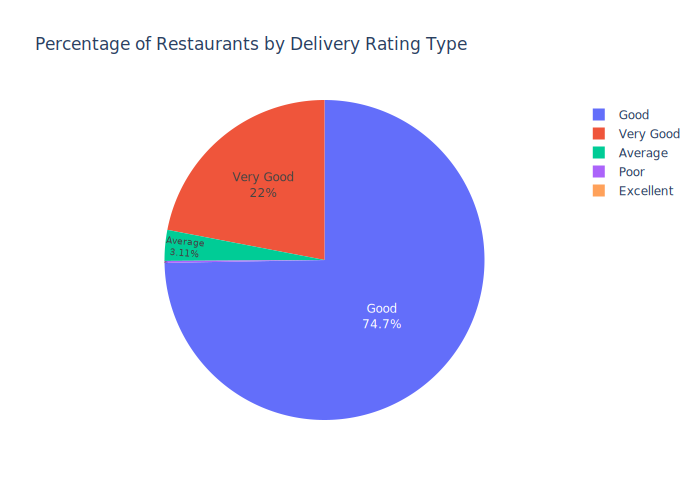

In [78]:
fig = px.pie(Delivery_rating_type_df, names='Delivery Rating Type', values='count', color='Delivery Rating Type',
        title='Percentage of Restaurants by Delivery Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [81]:
Biryani_df = zomato_df[zomato_df['Cuisine'].str.contains('Biryani')]
Biryani_df.sort_values(by='Dining Rating',ascending=False).head(10)

Name of Restaurant     Location  \
116                  AlMaza   Anna Nagar   
199    Arabian Kebab Center  Kodambakkam   
9037              Palmshore   Medavakkam   
154               Nair Mess   Triplicane   
8757  Yaa Mohaideen Biryani   Pallavaram   
96            Urban Spatula   Anna Nagar   
9038              Palmshore    Ramapuram   
47                Palmshore       Egmore   
283         Shiraz Art Cafe  Neelangarai   
1        Sukkubhai Biriyani      Alandur   

                                                Cuisine  \
116          Arabian,  Mughlai,  North Indian,  Biryani   
199                      Biryani,  North Indian,  Kebab   
9037  North Indian,  Chinese,  Arabian,  BBQ,  Birya...   
154                              South Indian,  Biryani   
8757                          Biryani,  Chinese,  Tamil   
96    Continental,  Seafood,  Biryani,  Italian,  No...   
9038  North Indian,  Chinese,  Arabian,  BBQ,  Birya...   
47    North Indian,  Chinese,  Arabian,  BBQ,  Birya...   
283             Continental,  Parsi,  Biryani,  Iranian   
1     Biryani,  North Indian,  Mughlai,  Desserts,  ...   

                                             Top Dishes  Price for 2  \
116   Faluda,  Rara Gosht,  Buttermilk,  Naan,  Bhar...       1000.0   
199   Shawarma,  Chicken Grill,  Brinjal Gravy,  Chi...        400.0   
9037  Mutton Mandi,  Biryani,  Brownie,  Bbq Fish,  ...       1000.0   
154   Fish Fry,  Omelette,  Vanjaram Fry,  Masala Pr...        200.0   
8757  Mutton Biryani,  Chicken 65,  Chicken Biryani,...        600.0   
96    Burgers,  Pasta,  Fish,  Fries,  Chips,  Salad...        800.0   
9038  Fish,  Brownie,  Faluda,  Murgh Platter,  Praw...       1000.0   
47    Mutton Mandi,  Fish,  Brownie,  Sea Food,  Bir...       1000.0   
283   Tea,  Baklava Cake,  Fish,  Pepper Chicken,  P...       1100.0   
1     Beef Biryani,  Beef Fry,  Paratha,  Paya,  Bri...       1000.0   

      Dining Rating  Dining Rating Count  Delivery Rating  \
116             4.6                  764              4.2   
199             4.6                  798              0.0   
9037            4.5                 1942              3.8   
154             4.5                 1038              0.0   
8757            4.5                 3414              0.0   
96              4.4                  794              4.3   
9038            4.4                 4805              4.1   
47              4.4                 2162              4.0   
283             4.4                  700              0.0   
1               4.4                 3059              4.1   

      Delivery Rating Count  \
116                     881   
199                       0   
9037                   4379   
154                       0   
8757                      0   
96                      911   
9038                  17300   
47                     9721   
283                       0   
1                     39200   

                                               Features Dining Rating Type  \
116   Home Delivery, Indoor Seating, Table booking r...          Very Good   
199                         Takeaway Only, Free Parking          Very Good   
9037  Home Delivery, Valet Parking Available, Indoor...          Very Good   
154                                      Indoor Seating          Very Good   
8757     Indoor Seating, Table Reservation Not Required          Very Good   
96    Home Delivery, Free Parking, Table booking rec...          Very Good   
9038  Home Delivery, Valet Parking Available, Table ...          Very Good   
47    Home Delivery, Indoor Seating, Table booking f...          Very Good   
283   Home Delivery, Wifi, Brunch, Indoor Seating, T...          Very Good   
1     Home Delivery, Free Parking, Table booking rec...          Very Good   

     Delivery Rating Type  
116             Very Good  
199                   NaN  
9037                 Good  
154                   NaN  
8757                  NaN  
96              Very Good  
9038        

In [82]:
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.5]
highest_rated_df

Name of Restaurant      Location  \
15                 Welcome Hotel  Purasavakkam   
24                Eating Circles      Alwarpet   
37                  Shree Mithai       Chetpet   
50                   Andhikkadai     Velachery   
57                Brownie Heaven    Royapettah   
...                          ...           ...   
9279  Gastronomer By Double Roti     Teynampet   
9358               Writer's Cafe      Taramani   
9363                 Flower Drum         Adyar   
9367                 Cream Stone  Thuraipakkam   
9541                Bombay Kulfi    Anna Nagar   

                                  Cuisine  \
15    South Indian,  Desserts,  Beverages   
24                           South Indian   
37       Mithai,  Street Food,  Fast Food   
50                           South Indian   
57          Bakery,  Desserts,  Beverages   
...                                   ...   
9279          Cafe,  American,  Fast Food   
9358                      Cafe,  American   
9363                       Chinese,  Thai   
9367                 Desserts,  Ice Cream   
9541                            Ice Cream   

                                             Top Dishes  Price for 2  \
15    Pongal,  Podi Dosa,  Idli Sambar,  Vada Curry,...        300.0   
24    Rose Milk,  Neer Dosa,  Thatte Idli,  Open Mas...        250.0   
37    Chaat,  Badam Milk,  Pav Bhaji,  Panipuri,  Ra...        300.0   
50    Coffee,  Sweet Kozhukattai,  Idli,  Pongal,  K...        200.0   
57    Vanilla Ice Cream,  Brownie Shake,  Filtered C...        350.0   
...                                                 ...          ...   
9279  Burgers,  Fries,  Oreo Shake,  Healthy Wealthy...        900.0   
9358  Hot Chocolate,  Pizza,  Pasta,  Waffles,  Spag...        600.0   
9363  Momos,  Noodle,  Dimsum Platter,  Schezwan Fri...        800.0   
9367  Death By Chocolate,  Chocolava,  Tiramisu,  Ch...        350.0   
9541  Calcutta Paan,  Tender Coconut Kulfi,  Paan Ic...        200.0   

      Dining Rating  Dining Rating Count  Delivery Rating  \
15              4.5                 1094              0.0   
24              4.7                  782              4.2   
37              4.6                 1085              4.4   
50              4.6                  908              4.2   
57              4.9                  842              4.3   
...             ...                  ...              ...   
9279            4.5                 2341              4.2   
9358            4.5                  497              4.1   
9363            4.5                  617              4.3   
9367            4.5                  683              4.2   
9541            4.6                  397              4.4   

      Delivery Rating Count  \
15                        0   
24                     2744   
37                    18600   
50                    17300   
57                     2270   
...                     ...   
9279                   2577   
9358                    360   
9363                    819   
9367                   4553   
9541                   3468   

                                               Features Dining Rating Type  \
15           Breakfast, Vegetarian Only, Indoor Seating          Very Good   
24    Breakfast, Home Delivery, Vegetarian Only, Ind...          Very Good   
37    Breakfast, Home Delivery, Vegetarian Only, Fre...          Very Good   
50    Breakfast, Home Delivery, Vegetarian Only, Ind...          Very Good   
57    Home Delivery, Indoor Seating, Desserts and Bakes          Very Good   
...                                                 ...                ...   
9279                Home Delivery, Indoor Seating, Wifi          Very Good   
9358  Home Delivery, Indoor Seating, Table booking r...          Very Good   
9363  Home Delivery, Wheelchair Accessible, Vegetari...          Very Good   
9367  Home Delivery, Vegetarian Only, Indoor Seating...          Very Good   
9541  Home Delivery, Sugar Free Options, Fr

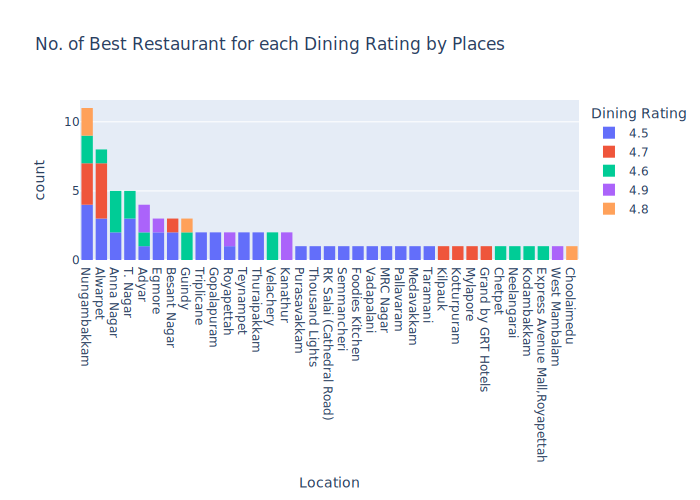

In [83]:
fig = px.histogram(highest_rated_df, x='Location', color='Dining Rating',
 title= 'No. of Best Restaurant for each Dining Rating by Places').update_xaxes(categoryorder="total descending")
fig.show()

In [84]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Dining Rating'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

Location  Dining Rating  Price for 2
0     Adyar            4.5   800.000000
1     Adyar            4.6  1800.000000
2     Adyar            4.9   350.000000
3  Alwarpet            4.5  1383.333333
4  Alwarpet            4.6  2500.000000

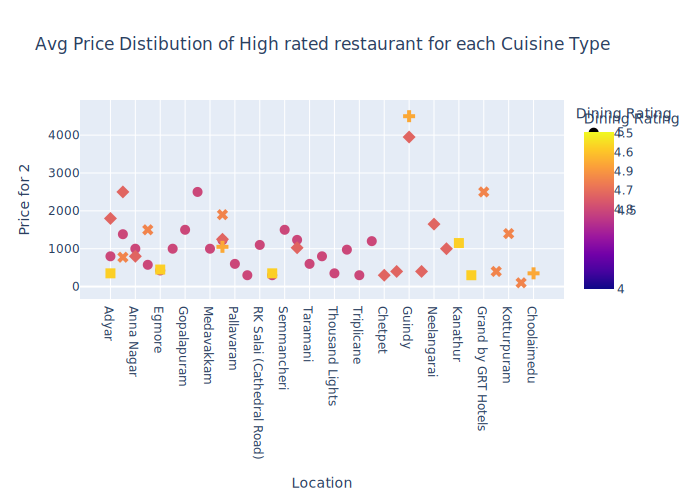

In [86]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Dining Rating", symbol="Dining Rating",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

In [87]:
chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')]
chinese_df

Name of Restaurant                      Location  \
2          SS Hyderabad Biryani                   Kodambakkam   
4                 Tasty Kitchen                      Perambur   
5                    Dine N Fun                    Medavakkam   
8             Savoury Sea Shell                    Anna Nagar   
9      Sangeetha Veg Restaurant                      T. Nagar   
...                         ...                           ...   
11883              Hotel Rahman                  Chengalpattu   
11886              Hotel Rahman                    Medavakkam   
11887              Hotel Rahman  Old Mahabalipuram Road (OMR)   
11959         The Shangai Story                    Madipakkam   
11960         The Shangai Story                       Egatoor   

                                                 Cuisine  \
2             Biryani,  North Indian,  Chinese,  Arabian   
4      Chinese,  Biryani,  North Indian,  Chettinad, ...   
5                  South Indian,  North Indian,  Chinese   
8      Arabian,  Chinese,  North Indian,  Lebanese,  ...   
9      South Indian,  North Indian,  Chinese,  Chetti...   
...                                                  ...   
11883                        Biryani,  Chinese,  Arabian   
11886                        Biryani,  Chinese,  Arabian   
11887                        Biryani,  Chinese,  Arabian   
11959                                            Chinese   
11960                                            Chinese   

                                              Top Dishes  Price for 2  \
2      Brinjal Curry,  Tandoori Chicken,  Chicken Gri...        500.0   
4      Mutton Biryani,  Chicken Rice,  Tomato Rice,  ...        450.0   
5      Chicken Grill,  Shawarma,  Naan,  Chicken Butt...        450.0   
8      Shawarma,  Chicken Grill,  Brownie,  Sea Food,...       1400.0   
9      Filtered Coffee,  Chaat,  Faluda,  Masala Dosa...        800.0   
...                                                  ...          ...   
11883                                            Invalid        300.0   
11886                                            Invalid        300.0   
11887                                            Invalid        300.0   
11959                                            Invalid        350.0   
11960                                            Invalid        350.0   

       Dining Rating  Dining Rating Count  Delivery Rating  \
2                4.3                 1361              4.4   
4                4.2                  617              4.1   
5                4.1                  567              3.8   
8                4.2                 2564              4.1   
9                4.4                 1578              4.2   
...              ...                  ...              ...   
11883            0.0                    0              3.4   
11886            0.0                    0              3.9   
11887            0.0                    0              3.2   
11959            0.0                    0              2.9   
11960            0.0                    0              2.7   

       Delivery Rating Count  \
2                      10500   
4                      22400   
5                      24700   
8                      21700   
9                      39600   
...                      ...   
11883                    127   
11886                    101   
11887                     26   
11959                     17   
11960                     17   

                                                Features Dining Rating Type  \
2                          Home Delivery, Indoor Seating          Very Good   
4                          Home Delivery, Indoor Seating          Very Good   
5                          Home Delivery, Indoor Seating          Very Good   
8      Home Delivery, Indoor Seating, Card Upon Deliv...          Very Good   
9      Breakfast, Home Delivery, Vegetarian Only, Ind...          Very Good   
...                           

In [88]:
# Aggregating and renaming columns
chinese_rest_df = chinese_df.groupby(by='Location').agg({'Name of Restaurant': 'count', 'Price for 2': 'mean'}).rename(columns={'Name of Restaurant': 'COUNT OF RESTAURANTS', 'Price for 2': 'AVERAGE PRICE'})

# Sorting by 'COUNT OF RESTAURANTS' and selecting the top 25
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)

# Display the top 25 rows
print(chinese_rest_df.head())

            COUNT OF RESTAURANTS  AVERAGE PRICE
Location                                       
Anna Nagar                   129     544.961240
Porur                         93     453.225806
Ambattur                      87     401.149425
T. Nagar                      85     550.588235
Velachery                     82     557.317073


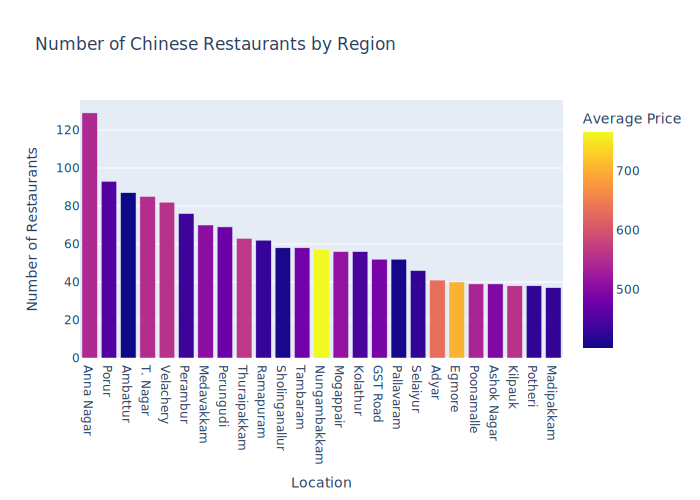

In [89]:
import pandas as pd
import plotly.express as px

# Assuming you have this DataFrame
# chinese_rest_df = ...

# Reset index if 'REGION' is currently the index
chinese_rest_df = chinese_rest_df.reset_index()

# Create the bar chart
fig = px.bar(
    chinese_rest_df,
    x='Location',
    y='COUNT OF RESTAURANTS',
    color='AVERAGE PRICE',
    title='Number of Chinese Restaurants by Region',
    labels={'COUNT OF RESTAURANTS': 'Number of Restaurants', 'AVERAGE PRICE': 'Average Price'},
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the figure
fig.show()

In [90]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating'])['Price for 2'].mean().reset_index()
price_rating_df

Cuisine  Dining Rating  \
0                                              American            0.0   
1     American,  Andhra,  Asian,  Beverages,  Chetti...            2.4   
2                                American,  Continental            4.1   
3           American,  Continental,  European,  Italian            3.9   
4     American,  Continental,  Italian,  North India...            4.1   
...                                                 ...            ...   
4505                                    Tibetan,  Momos            3.6   
4506                                    Tibetan,  Momos            3.8   
4507                                    Tibetan,  Momos            4.0   
4508                                    Turkish,  Kebab            4.3   
4509                                              Wraps            0.0   

      Price for 2  
0           500.0  
1           800.0  
2          1600.0  
3           700.0  
4           800.0  
...           ...  
4505        400.0  
4506        400.0  
4507        400.0  
4508        500.0  
4509        150.0  

[4510 rows x 3 columns]

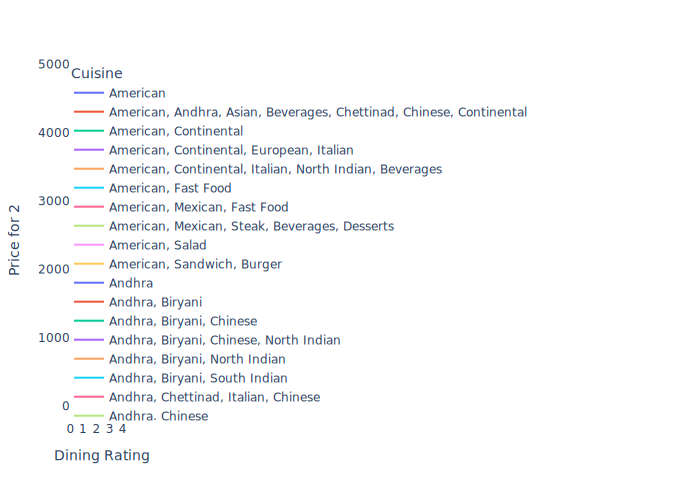

In [91]:
fig = px.line(price_rating_df, y="Price for 2", x="Dining Rating",color='Cuisine')
fig.show()

In [92]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

Location  Price for 2
0              ...  1500.000000
1    A Radha Hotel  1900.000000
2    Abhiramapuram   230.000000
3       Adambakkam   306.790123
4            Adyar   476.708075
..             ...          ...
126         Vepery   303.571429
127   Vettuvankeni   568.750000
128  Virugambakkam   377.358491
129   Washermenpet   340.909091
130  West Mambalam   273.673469

[131 rows x 2 columns]

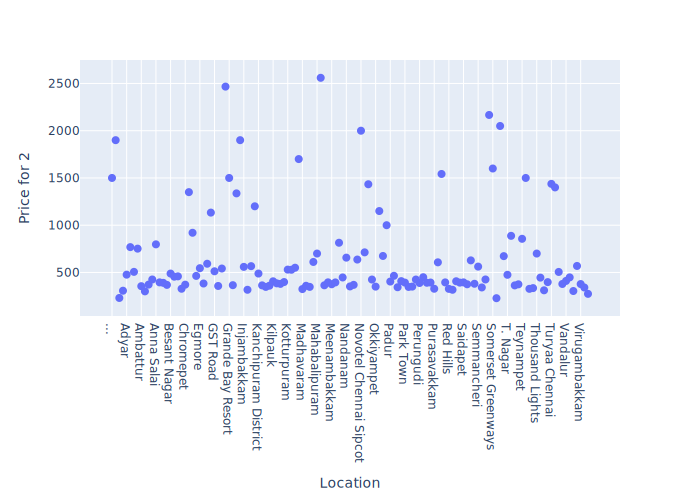

In [93]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()

In [94]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
print ('One Fourth Price is:',one_fourth_price)

One Fourth Price is: 1250.0


In [95]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df

Name of Restaurant  Price for 2  \
4685                       Soda Hub         40.0   
1448                     Mamee Soup         60.0   
4825                  Anbu Unavagam        100.0   
108                    Rayar's Mess        100.0   
2860       Thirunelveli Halwa Stall        100.0   
...                             ...          ...   
3179  Lava Bar at Metro Grand Hotel       1200.0   
1171   Kapi Multicuisine Restaurant       1200.0   
1166            The Roof Top Lounge       1200.0   
383              Broken Bridge Cafe       1200.0   
382                        Wok Monk       1200.0   

                                    Cuisine               Location  \
4685                              Beverages               Navallur   
1448                           Healthy Food          West Mambalam   
4825                           South Indian              Velachery   
108                            South Indian               Mylapore   
2860          Street Food,  Mithai,  Juices           Nungambakkam   
...                                     ...                    ...   
3179                               Bar Food             Arumbakkam   
1171  South Indian,  North Indian,  Chinese  East Coast Road (ECR)   
1166       BBQ,  North Indian,  Continental                 Guindy   
383           Cafe,  North Indian,  Malwani     Somerset Greenways   
382        Asian,  Chinese,  Middle Eastern             Anna Nagar   

      Dining Rating  
4685            3.2  
1448            4.1  
4825            3.4  
108             4.7  
2860            3.0  
...             ...  
3179            3.3  
1171            2.6  
1166            4.0  
383             4.3  
382             4.6  

[8197 rows x 5 columns]

In [96]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Dining Rating']]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price for 2', inplace=True)
highrate_rest_df

Name of Restaurant  Price for 2  \
108                               Rayar's Mess        100.0   
178                        Royal Sandwich Shop        150.0   
50                                 Andhikkadai        200.0   
154                                  Nair Mess        200.0   
320                               Bombay Kulfi        200.0   
..                                         ...          ...   
445  Dakshin - Crowne Plaza Chennai Adyar Park       2500.0   
395            Southern Spice - Taj Coromandel       3000.0   
229                   Vasco's - Hilton Chennai       3400.0   
443                 Avartana - ITC Grand Chola       4500.0   
303                 Peshawri - ITC Grand Chola       4500.0   

                                Cuisine      Location  Dining Rating  
108                        South Indian      Mylapore            4.7  
178    Fast Food,  Desserts,  Beverages      Alwarpet            4.7  
50                         South Indian     Velachery            4.6  
154              South Indian,  Biryani    Triplicane            4.5  
320                           Ice Cream         Adyar            4.9  
..                                  ...           ...            ...  
445      South Indian,  Kerala,  Andhra      Alwarpet            4.6  
395                        South Indian  Nungambakkam            4.7  
229  North Indian,  Continental,  Asian        Guindy            4.6  
443   South Indian,  Chinese,  Desserts        Guindy            4.8  
303              North Indian,  Mughlai        Guindy            4.6  

[76 rows x 5 columns]

In [97]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Dining Rating_x']]
highrate_aff_df.rename(columns={'Name of Restaurant':'NAME', 'Price for 2_x':'PRICE', 'Cuisine_x':'Cuisine',
 'Location':'REGION', 'Dining Rating_x':'Dining Rating'},inplace=True)

In [98]:
highrate_aff_df

NAME   PRICE  \
0                         Rayar's Mess   100.0   
1                  Royal Sandwich Shop   150.0   
2                  Royal Sandwich Shop   150.0   
3                  Royal Sandwich Shop   150.0   
4                          Andhikkadai   200.0   
5                         Bombay Kulfi   200.0   
6                         Bombay Kulfi   200.0   
7                            Nair Mess   200.0   
8                       Eating Circles   250.0   
9                         Shree Mithai   300.0   
10                       Welcome Hotel   300.0   
11                   The Sandwich Shop   300.0   
12                                  ID   300.0   
13                         Cream Stone   350.0   
14                         Cream Stone   350.0   
15    Momo Sa-Khang by Kailash Kitchen   350.0   
16           Fruit Shop On Greams Road   350.0   
17                      Brownie Heaven   350.0   
18                     Fusilli Reasons   400.0   
19                Arabian Kebab Center   400.0   
20                        Krispy Kreme   400.0   
21  Shmoozie's Hand-Crafted Ice Creams   400.0   
22                          Ratna Cafe   400.0   
23                  North East Kitchen   450.0   
24                           BurgerMan   450.0   
25                        Kabab Corner   450.0   
26               Shri Rajasthani Dhaba   500.0   
27  Amadora Gourmet Ice Cream & Sorbet   500.0   
28               Prems Graama Bhojanam   500.0   
29       New Pattukottai Kamatchi Mess   550.0   
30          Shyam's Bombay Halwa House   600.0   
31                       Writer's Cafe   600.0   
32               Yaa Mohaideen Biryani   600.0   
33                               Mezze   700.0   
34                     Blind Ch3mistry   700.0   
35                     Blind Ch3mistry   700.0   
36                     Blind Ch3mistry   700.0   
37                         Flower Drum   800.0   
38                             Bhangra   800.0   
39                         Haagen Dazs   800.0   
40          Gastronomer By Double Roti   900.0   
41                       Absolute Thai  1000.0   
42                              AlMaza  1000.0   
43                        VB Signature  1000.0   
44                           Palmshore  1000.0   
45    The Brew Room - The Savera Hotel  1100.0   
46                             Kuuraku  1200.0   
47               Kappa Chakka Kandhari  1200.0   
48                            Wok Monk  1200.0   

                                              Cuisine  \
0                                        South Indian   
1                    Fast Food,  Desserts,  Beverages   
2                    Fast Food,  Desserts,  Beverages   
3                    Fast Food,  Desserts,  Beverages   
4                                        South Indian   
5                                           Ice Cream   
6                                           Ice Cream   
7                              South Indian,  Biryani   
8                                        South Indian   
9                    Mithai,  Street Food,  Fast Food   
10                South Indian,  Desserts,  Beverages   
11                   Sandwich,  Fast Food,  Beverages   
12                                       South Indian   
13                               Desserts,  Ice Cream   
14                               Desserts,  Ice Cream   
15                                    Momos,  Chinese   
16      Beverages,  Fast Food,  Healthy Food,  Juices   
17                      Bakery,  Desserts,  Beverages   
18                                          Fast Food   
19                     Biryani,  North Indian,  Kebab   
20                               Desserts,  Beverages   
21                               Ice Cream,  Desserts   
22   South Indian,  Chinese,  Street Food,  Beverages   
23                           Chinese,  Konkan,  Momos   
24                     Burger,  Fast Food,  Beverages   
25                            Kebab,  Rolls,  Mughl